# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['muli',
 'victoria',
 'irituia',
 'mataura',
 'portland',
 'saint george',
 'barentsburg',
 'petauke',
 'port alfred',
 'ushuaia',
 'kaduy',
 'salamiyah',
 'tuktoyaktuk',
 'kapaa',
 'new norfolk',
 'taolanaro',
 'koygorodok',
 'havoysund',
 'clyde river',
 'carnarvon',
 'severo-kurilsk',
 'mar del plata',
 'alekseyevka',
 'santa marta',
 'pelotas',
 'balykshi',
 'busselton',
 'moose factory',
 'avera',
 'starkville',
 'hithadhoo',
 'berlevag',
 'jamestown',
 'norman wells',
 'limaong',
 'newport beach',
 'kapit',
 'hervey bay',
 'half moon bay',
 'coquimbo',
 'qaanaaq',
 'weinan',
 'manikchhari',
 'garissa',
 'vaini',
 'tual',
 'bluff',
 'cape town',
 'saint-pierre',
 'samusu',
 'georgetown',
 'ribeira grande',
 'sao filipe',
 'sechura',
 'hovd',
 'merauke',
 'upernavik',
 'hit',
 'vozrozhdeniye',
 'bredasdorp',
 'svetlogorsk',
 'punta arenas',
 'le port',
 'divnomorskoye',
 'miri',
 'pevek',
 'khatanga',
 'urumqi',
 'aberdare',
 'nikolskoye',
 'klaksvik',
 'hermanus',
 'belushya guba

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
i = 0
columns = ['City latitude','City longitude','Max temperature',
   'Humidity','Cloud coverage','Wind speed',
   'City country', 'City', # though not in the rubric. Seems required for part 2?
   'City datetime'
]
rows = []

positions = list(citipy.WORLD_CITIES_DICT.keys())
sample = np.random.random_integers(0, len(positions),600)

for x in sample:
    pos = positions[x]
    city = citipy.WORLD_CITIES_DICT[pos]

    link = "https://api.openweathermap.org/data/2.5/weather?lat={0}&lon={1}&appid={2}".format(pos[0], pos[1], weather_api_key)
    #print(link)
    print(i, city.city_name)
    resp = requests.get(link)
    data = resp.json()
    try :
      rows.append( [pos[0], pos[1], data['main']['temp_max'],
               data['main']['humidity'], data['clouds']['all'], data['wind']['speed'],
               data['sys']['country'], city.city_name, data['dt']] )
    except KeyError:
       pass 
    if i == 600:
       break
    i += 1

df = pd.DataFrame(rows, columns = columns);    

C:\Users\lshrn\AppData\Local\Temp/ipykernel_20516/3601640128.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 46723 + 1) instead
  sample = np.random.random_integers(0, len(positions),600)


0 armenia
1 alamos
2 bonita
3 ixhuatan
4 pluderhausen
5 kwekwe
6 jose de freitas
7 chirnside
8 terneuzen
9 babiciu
10 voerendaal
11 cootamundra
12 kimamba
13 bolpur
14 senlis
15 sedriano
16 nova russas
17 tevaitoa
18 los dos caminos
19 cove
20 puerto el triunfo
21 tumwater
22 budaors
23 acarau
24 coatepeque
25 palauig
26 albesti
27 ena
28 guarumal
29 ajdabiya
30 oktyabrskaya
31 san francisco del mar
32 macon
33 leixlip
34 kuppam
35 pishva
36 kasur
37 thionville
38 arden
39 murgesti
40 paraiba do sul
41 yazykovo
42 medgidia
43 tambov
44 las rosas
45 laon
46 marianske lazne
47 riviere du rempart
48 frickenhausen
49 jones
50 veryina
51 bistra
52 bhatgaon
53 amilly
54 mlonggo
55 sao bento do sul
56 sento se
57 mirwah
58 lanipao
59 ipoh
60 dudley
61 megala kalivia
62 braesti
63 tinambacan
64 szatymaz
65 dayong
66 chocaman
67 fort lauderdale
68 stephenville crossing
69 spirit river
70 zafarabad
71 tinjah
72 remich
73 kirovgrad
74 melekhovskaya
75 orlesti
76 munster
77 varzea grande
78 alayao

In [33]:
#Dependencies
import json



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
df.to_csv("weather.csv", index=False)

In [35]:
df

,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City,City datetime
0,13.743611,-89.498889,296.37,91,59,1.38,SV,armenia,1651212048
1,27.016667,-108.933333,294.46,27,4,0.80,MX,alamos,1651212000
2,32.657778,-117.029167,288.66,73,100,2.57,US,bonita,1651212266
3,16.356944,-94.482500,301.07,65,4,1.23,MX,ixhuatan,1651212267
4,48.800000,9.600000,282.90,80,34,1.17,DE,pluderhausen,1651212268
...,...,...,...,...,...,...,...,...,...
595,-14.018889,-75.758056,292.26,80,96,0.23,PE,subtanjalla,1651212702
596,-12.966667,28.633333,288.60,81,9,3.51,ZM,ndola,1651212703
597,36.050000,140.166667,286.45,99,100,6.00,JP,naka,1651212704
598,7.583333,18.633333,297.39,78,100,1.73,CF,kabo,1651212705


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
df[df['Humidity'] > 100]

,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City,City datetime


In [37]:
#  Get the indices of cities that have humidity over 100%.
df[df['Humidity'] > 100].index

Int64Index([], dtype='int64')

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df = df[df['Humidity'] <= 100]

In [39]:

df

,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City,City datetime
0,13.743611,-89.498889,296.37,91,59,1.38,SV,armenia,1651212048
1,27.016667,-108.933333,294.46,27,4,0.80,MX,alamos,1651212000
2,32.657778,-117.029167,288.66,73,100,2.57,US,bonita,1651212266
3,16.356944,-94.482500,301.07,65,4,1.23,MX,ixhuatan,1651212267
4,48.800000,9.600000,282.90,80,34,1.17,DE,pluderhausen,1651212268
...,...,...,...,...,...,...,...,...,...
595,-14.018889,-75.758056,292.26,80,96,0.23,PE,subtanjalla,1651212702
596,-12.966667,28.633333,288.60,81,9,3.51,ZM,ndola,1651212703
597,36.050000,140.166667,286.45,99,100,6.00,JP,naka,1651212704
598,7.583333,18.633333,297.39,78,100,1.73,CF,kabo,1651212705


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

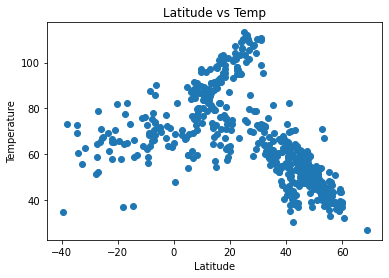

In [44]:
fahrenheit = (df['Max temperature'] - 273.15) * 9 /5  + 32
plt.scatter(df['City latitude'], fahrenheit)
plt.title('Latitude vs Temp')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

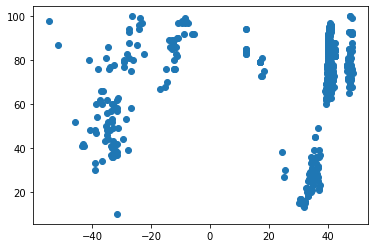

In [13]:
plt.scatter(df['City latitude'], df['Humidity'])


## Latitude vs. Cloudiness Plot

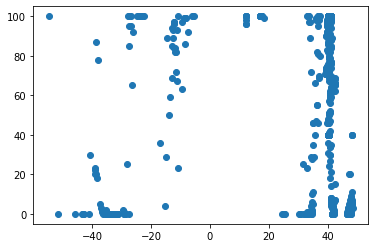

In [14]:

plt.scatter(df['City latitude'], df['Cloud coverage'])


## Latitude vs. Wind Speed Plot

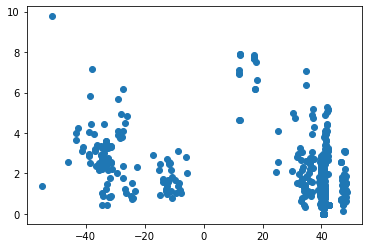

In [15]:

plt.scatter(df['City latitude'], df['Wind speed'])


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

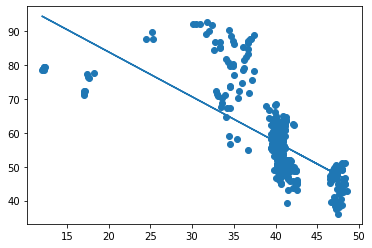

In [16]:
north = df[df['City latitude'] > 0]
fahrenheit = (north['Max temperature'] - 273.15) * 9 /5  + 32
slope, intercept, r, p, se = linregress(north['City latitude'], fahrenheit)
pred = north['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], fahrenheit)
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

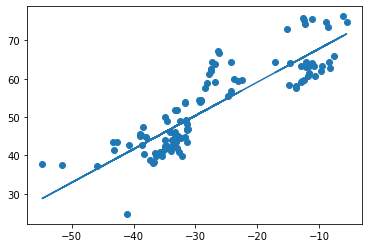

In [17]:
south = df[df['City latitude'] < 0]
fahrenheit = (south['Max temperature'] - 273.15) * 9 /5  + 32
slope, intercept, r, p, se = linregress(south['City latitude'], fahrenheit)
pred = south['City latitude'] * slope + intercept;
plt.scatter(south['City latitude'], fahrenheit)
plt.plot(south['City latitude'], pred)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

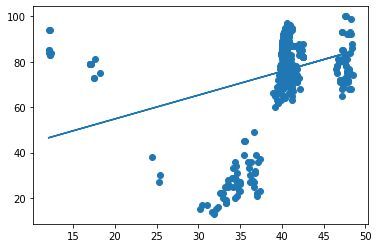

In [18]:
north = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(north['City latitude'], north['Humidity'])
pred = north['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], north['Humidity'])
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

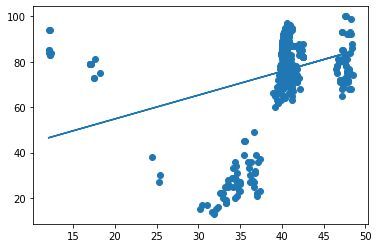

In [19]:
south = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(south['City latitude'], south['Humidity'])
pred = south['City latitude'] * slope + intercept;
plt.scatter(south['City latitude'], south['Humidity'])
plt.plot(south['City latitude'], pred)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

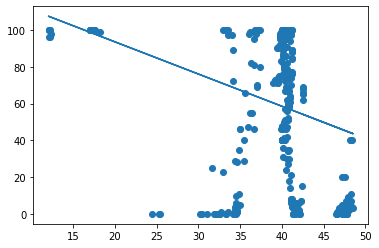

In [20]:
north = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(north['City latitude'], north['Cloud coverage'])
pred = north['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], north['Cloud coverage'])
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

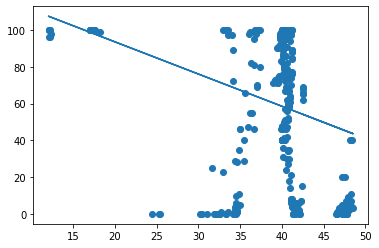

In [21]:
south = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(south['City latitude'], south['Cloud coverage'])
pred = south['City latitude'] * slope + intercept;
plt.scatter(north['City latitude'], south['Cloud coverage'])
plt.plot(south['City latitude'], pred)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

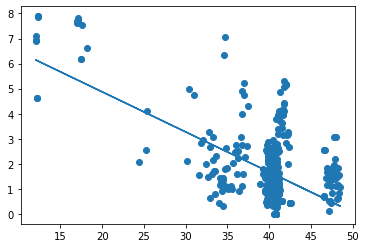

In [22]:
north = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(north['City latitude'], north['Wind speed'])
pred = north['City latitude'] * slope + intercept
plt.scatter(north['City latitude'], north['Wind speed'])
plt.plot(north['City latitude'], pred)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

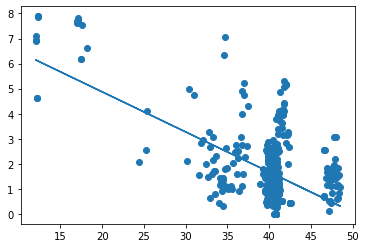

In [23]:
south = df[df['City latitude'] > 0]
slope, intercept, r, p, se = linregress(south['City latitude'], south['Wind speed'])
pred = south['City latitude'] * slope + intercept
plt.scatter(south['City latitude'], south['Wind speed'])
plt.plot(south['City latitude'], pred)